In [1]:
# **Part 1 -> Data Preprocessing**

# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the training set
#     We train the RNN only on our test set, its like the test set doens't exist for RNN
df_train = pd.read_csv('Recurrent_Neural_Networks/Google_Stock_Price_Train.csv')

#     Contains the input data of the neural network
training_set = df_train.iloc[:, 1:2].values  # We add 2 just to make it a numpy array and not a vector

In [2]:
df_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [3]:
type(training_set)

numpy.ndarray

In [4]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
df_train.shape

(1258, 6)

In [6]:
# Feature Scaling
#     Its recommended to use NORMALIZATION in RNN when we have sigmoid as our activation function for the
#     output layer
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
#     Recommended to keep training set unaltered
training_set_scaled = sc.fit_transform(training_set)

In [7]:
# Creating a data structure with 60 timesteps and 1 output
#     60 timesteps means that at each time t the RNN is going to look at 60 stock prices
#     i.e stock prices between 60 days before time t and time t
#     Based on the trends it will predict the output at time t+1

X_train = []  #Contains 60 stock prices before that financial day
y_train = []  #Contain the stock price of the next financial day

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60: i, 0]) #we've only 1 columns(but : makes it 3d) so we use 0
    y_train.append(training_set_scaled[i, 0])

#     X_train and y_train are LISTS but we need arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [9]:
X_train.shape

(1198, 60)

In [10]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [11]:
y_train.shape

(1198,)

In [12]:
# Reshaping
#     Adding some more dimensionality to the data structure
#     It is the unit that is the number of predictors we can use to predict what we want
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # 1 indicates the no. of indicators

#   This is imp if we want to add some more indicators or do some more robust financial engineering

In [13]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [14]:
#  ***Part 2 -> Building the RNN***
#     We're going to build a stacked LSTM with some dropout regularization to prevent overfitting

# import warnings
# warnings.filterwarnings("ignore")


# Importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# Initializing the RNN as a sequence of layers
#     We will use computational graphs and build them using PyTorch later

regressor = Sequential()

# Adding the 1st LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))) # contains the last 2 dims
regressor.add(Dropout(0.2))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
# Adding the 2nd LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the 3rd LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the 4th LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50)) #its by default false
regressor.add(Dropout(0.2))

In [16]:
# Adding the output layer
regressor.add(Dense(1, activation = 'sigmoid'))

# Compiling the RNN
regressor.compile(optimizer= 'rmsprop', loss = 'mean_squared_error')
# regressor.compile(optimizer= 'adam', loss = 'mean_squared_error')

In [17]:
# Fitting the RNN to the training set
regressor.fit(X_train, y_train, epochs= 100, batch_size= 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0178
Epoch 2/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0062
Epoch 3/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0047
Epoch 4/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0042
Epoch 5/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0039
Epoch 6/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0034
Epoch 7/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0033
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0034
Epoch 9/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0027
Epoch 10/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0026
Epoch 11/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0028
Epoch 12/100
1198/1198 [==

Epoch 93/100
1198/1198 [==============================] - 4s 3ms/step - loss: 9.1877e-04
Epoch 94/100
1198/1198 [==============================] - 3s 3ms/step - loss: 8.1141e-04
Epoch 95/100
1198/1198 [==============================] - 3s 3ms/step - loss: 9.1300e-04
Epoch 96/100
1198/1198 [==============================] - 3s 3ms/step - loss: 8.3079e-04
Epoch 97/100
1198/1198 [==============================] - 3s 3ms/step - loss: 8.3275e-04
Epoch 98/100
1198/1198 [==============================] - 3s 3ms/step - loss: 8.3895e-04
Epoch 99/100
1198/1198 [==============================] - 3s 3ms/step - loss: 8.1278e-04
Epoch 100/100
1198/1198 [==============================] - 3s 3ms/step - loss: 7.8502e-04


In [18]:
# ***Part 3 -> Predicting and Visualizing the results***

#     Getting the real stock price of 2017
df_test = pd.read_csv('Recurrent_Neural_Networks/Google_Stock_Price_Test.csv')
real_stock_price = df_test.iloc[:, 1:2].values

In [22]:
type(real_stock_price)

numpy.ndarray

In [20]:
#     Getting the predicted stock price of 2017
#     Now for getting the stock prices of previous 60 days, we'll need some days from Jan 2017 
#     and some from Nov,Dec 2016
#     So for that we need to concatenate the two datasets

#     We will need to scale the test set but the problem is that we will change the actual test set and we should 
#     never do this

#     So, to overcome this we'll concatenate the original dataframes and then scale only the inputs and 
#     not the actual test values
df_total = pd.concat((df_train['Open'], df_test['Open']), axis= 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predictiing
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [21]:
predicted_stock_price

array([[765.40155],
       [763.6898 ],
       [766.2755 ],
       [766.4912 ],
       [768.49   ],
       [772.865  ],
       [774.9013 ],
       [774.3995 ],
       [775.2225 ],
       [776.6919 ],
       [777.56714],
       [777.6972 ],
       [777.79095],
       [778.64514],
       [779.3105 ],
       [783.3361 ],
       [786.8103 ],
       [789.5053 ],
       [790.1139 ],
       [786.5736 ]], dtype=float32)

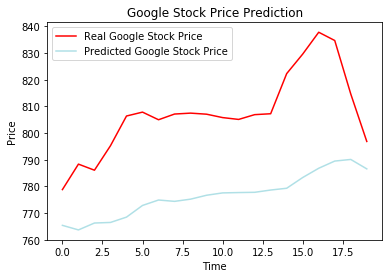

In [25]:
# Visualizing the Results
#     Witness the robustness of our model

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'powderblue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()